In [1]:
# Importamos las librerias necesarias
from multilayer_perceptron import NeuralNetwork, NeuralLayer
import numpy as np

## Preparando los datos
Queremos que la red neuronal sea capaz de resolver el problema de la compuerta logica XOR, un caso no-linealmente separable.

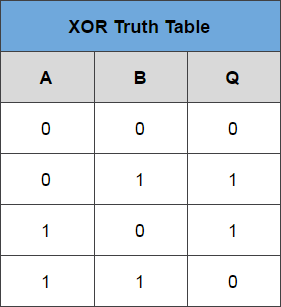

In [2]:
# Preparamos el dataset

# Lo que se introduce
inputs = np.array([
                    [0, 0], 
                    [0, 1], 
                    [1, 0], 
                    [1, 1]]) 
# Lo que se espera que la red responda por cada una de las entradas
expected = np.array([[0],  
                    [1],   
                    [1],   
                    [0]])       

## Definiendo la arquitectura de la red

Definimos el modelo de la red, todas se interconectan entre si de izquierda a derecha<br>
>  **2** Neuronas en la capa de entrada<br>
>  **4** Neuronas en la capa oculta<br>
>  **1** Neurona en la capa de salida<br>

Cada circulo representa una neurona (perceptrón) cuya salida se conecta de izquierda a derecha a la entrada de cada una de las neuronas de la siguiente capa.

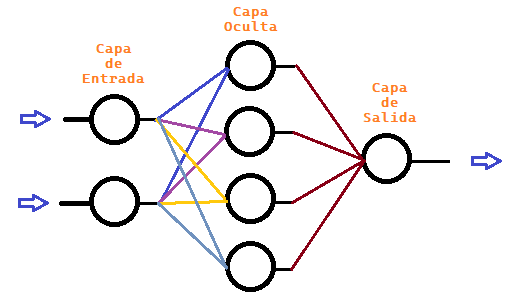

## Inicializando la Red Neuronal

In [3]:
layer_model = [
    NeuralLayer(2, 4),
    NeuralLayer(4, 1)
]

In [4]:
neural_network = NeuralNetwork(layer_model)

## Entrenamiento
Entrenaremos la red neuronal con los datos que preparamos, haremos itere sobre la red 1000 veces (epochs) hasta buscar el minimo local. 
Por cada iteración el aprendizaje se refina con una precisión de 0.001.

In [5]:
neural_network.train(inputs, expected, 50)
neural_network.learn_rate = 0.001

Una vez entrenada, realizamos las comprobaciones.

[[ 0.41946852]
 [ 0.94394202]
 [ 0.95039703]
 [-0.41781722]]
0.3561280249609018


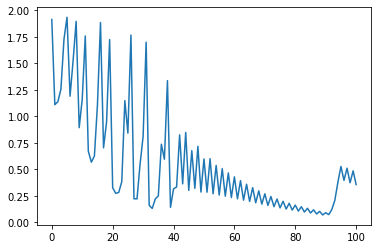

Input       Output     Valid
[0], -----> [0.] = 	OK 
[1], -----> [1.] = 	OK 
[1], -----> [1.] = 	OK 
[0], -----> [-0.] = 	OK 
0 [[-0.0191462   1.87338747  1.82226457  1.01565797]
 [ 0.94420717  1.87990601  1.73580013  1.04206177]] (2, 4)
1 [[-0.18919754]
 [ 1.8647151 ]
 [-1.63855705]
 [-0.6596042 ]] (4, 1)


In [6]:
output = neural_network.input(inputs) 
print(output)
neural_network.show_error()
print("Input       Output     Valid")
for out, y in zip(np.rint(output), expected):
    validation = ("\tOK" if int(out[0]) == y else "\tFAIL")
    print(f"{y}, -----> {out} = { validation } ")
for n, layer in enumerate(neural_network.layers):
    print(n, layer.synaptic_weights, layer.synaptic_weights.shape)
